#1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

###José María Ibarra a01706970

In [ ]:
#librerías
import pandas as pd
import numpy as np

In [ ]:
#ingresar a la ruta para carga de datos
%cd '/content/drive/MyDrive/ITESM/IA avanzada VII/B1 M1'
%ls

/content/drive/MyDrive/ITESM/IA avanzada VII/B1 M1
0_continuous_random_variables_a01706970.ipynb
A01706970_Actividad_distr_muestrales.ipynb
A01706970_Ejercicios_intervalos_pruebahip.ipynb
A01706970_Preprocessing_clase7.ipynb
A01706970_QQPlot_construction_actividad.ipynb
Automobile.csv
M1_preprocesamiento_a01706970.ipynb
Modelo.ipynb


In [ ]:
df = pd.read_csv('Automobile.csv') #importar datos
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.shape

(205, 26)

##Tipos de datos

In [ ]:
df.info() #info de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number-of-doors    205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.describe() #descripción de los datos

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


##Distribución de variables

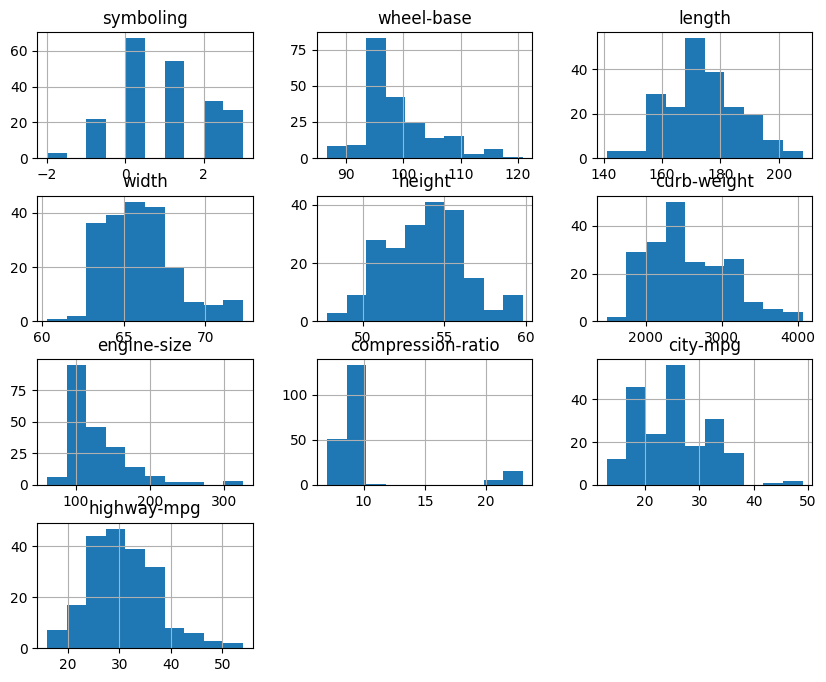

In [ ]:
#histogramas
df.hist(figsize=(10,8));

##Valores nulos

In [ ]:
df.isna().sum() #verificar valores nulos

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
number-of-doors      0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No hay valores reconocidos como nulos, sin embargo, sí hay mediciones faltantes representadas como '?'

In [ ]:
value = '?'
for column in df.columns: #Revisar valores '?' (nulos) en los datos
  if any(value == x for x in df[column]):
    print(column)

normalized-losses
number-of-doors
bore
stroke
horsepower
peak-rpm
price


In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.isna().sum() #verificar valores nulos

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
number-of-doors       2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Ya que identificamos correctamente los valores nulos, los tratamos. En el caso de las columnas con pocos registros nulos, podemos eliminar esas observaciones, sin embargo, en el caso de la columna *normalized-losses*, precindimos de toda la columna por su porcentaje alto de datos faltantes.

En el caso de columnas identificadas como object incorrectamente, las cambiamos a su debido dtype.

In [ ]:
#Trato de valores nulos
df.dropna(subset=['number-of-doors','horsepower','peak-rpm','bore','stroke','price'], inplace=True)
df.drop(['normalized-losses'], inplace=True, axis=1)

#Corregir dtypes
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['price'] = df['price'].astype(int)
df['stroke'] = df['stroke'].astype(float)
df['bore'] = df['bore'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   number-of-doors    193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

##Tipo y escala de medición de los datos

In [ ]:
tipos = {'object': 'Categórico nominal', 'int64': 'Numérico discreto', 'float64': 'Numérico continuo'}
for column in df.columns:
    dtype_str = str(df[column].dtypes)  #tipo de dato a string
    data_type_description = tipos.get(dtype_str, 'Desconocido')  #Descripción
    print(f'{column} : {data_type_description}')

symboling : Numérico discreto
make : Categórico nominal
fuel-type : Categórico nominal
aspiration : Categórico nominal
number-of-doors : Categórico nominal
body-style : Categórico nominal
drive-wheels : Categórico nominal
engine-location : Categórico nominal
wheel-base : Numérico continuo
length : Numérico continuo
width : Numérico continuo
height : Numérico continuo
curb-weight : Numérico discreto
engine-type : Categórico nominal
num-of-cylinders : Categórico nominal
engine-size : Numérico discreto
fuel-system : Categórico nominal
bore : Numérico continuo
stroke : Numérico continuo
compression-ratio : Numérico continuo
horsepower : Numérico discreto
peak-rpm : Numérico discreto
city-mpg : Numérico discreto
highway-mpg : Numérico discreto
price : Numérico discreto


##Duplicados

In [ ]:
#ver duplicados
df[df.duplicated()]

,symboling,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


No hay registros duplicados

##Análisis de correlación

<ipython-input-133-91af870b7b07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

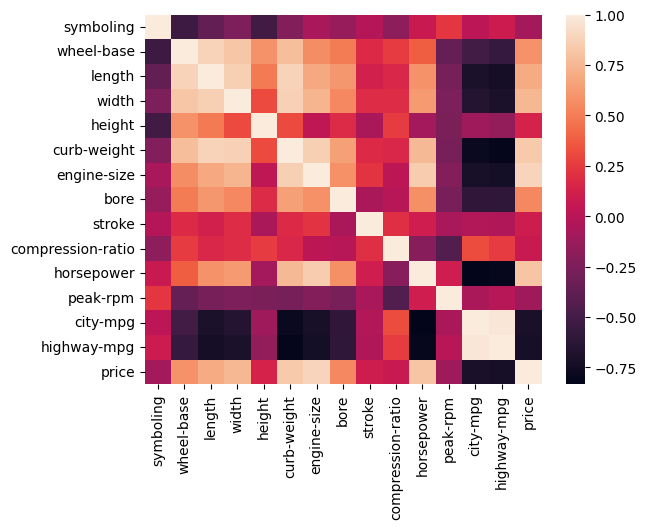

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

Las variables *city-mpg* y *highway-mpg* están altamente correlacionadas, por lo que podemos remover una de estas.

In [ ]:
#drop de variables correlacionadas
df.drop(['city-mpg','engine-size', 'length'], inplace=True, axis=1)

#drop de variables con baja correlación al tagret (price)
df.drop(df.corr().iloc[-1][(df.corr().iloc[-1]<0.4) & (df.corr().iloc[-1]>-0.4)].index, axis=1, inplace=True)

<ipython-input-134-8c07985d52e2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(df.corr().iloc[-1][(df.corr().iloc[-1]<0.4) & (df.corr().iloc[-1]>-0.4)].index, axis=1, inplace=True)


##Análisis de outliers

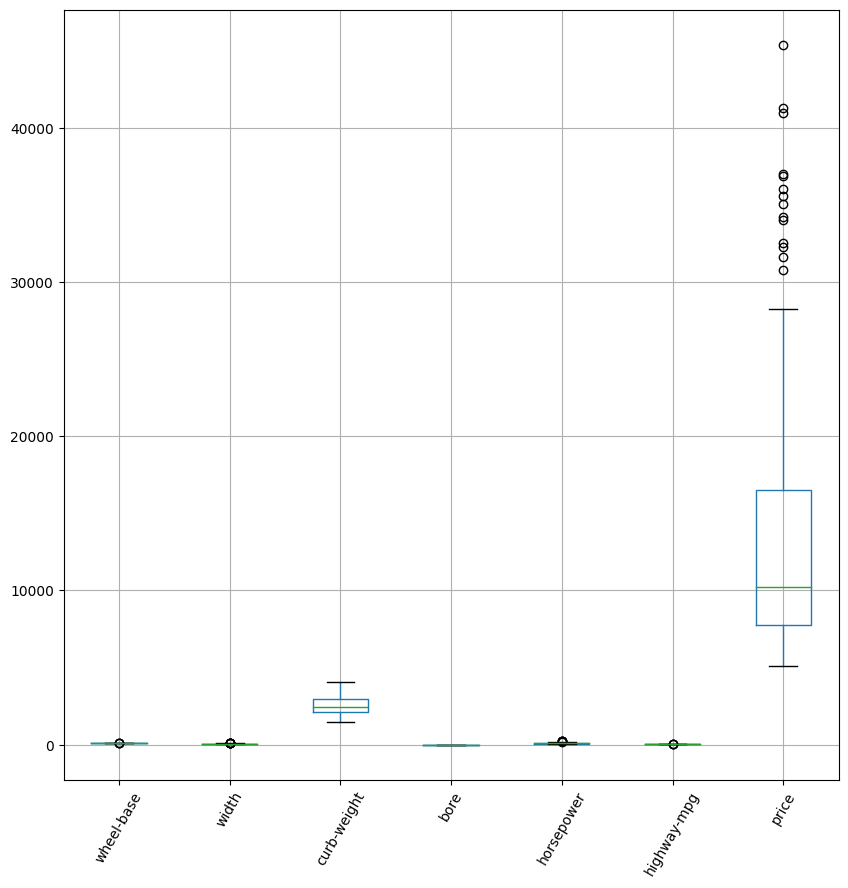

In [ ]:
#Revisar outliers
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
df.boxplot(ax=ax)
plt.xticks(rotation=60)
plt.show()

Solamente la variable *Price* tiene outliers notables. Si usamos esa variable como target, es necesario tener esa información, por lo que no se remueven del dataframe.

##Codificación de variables categóricas

Obtenemos los dummies para generar un modelo estadístico de predicción.

In [ ]:
#Codificar variables categóricas

cat = df.select_dtypes(include=['object']).columns

# Create one-hot encoded columns
dummies_df = pd.get_dummies(df, columns=cat)

dummies_df.shape

(193, 62)

#2 Construcción de un modelo estadístico base

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

##Regresión lineal

In [ ]:
from statsmodels.tools.tools import add_constant
#establecer datos para el modelo
y = dummies_df['price']
X = dummies_df[dummies_df.drop('price', axis=1).columns]
X = add_constant(X)

Construimos un modelo de regresión lineal, donde la *y* es la variable *price*

##Estadísticas del modelo

In [ ]:
#linear model
reg = sm.OLS(y, X)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     68.97
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.08e-78
Time:                        00:57:55   Log-Likelihood:                -1703.4
No. Observations:                 193   AIC:                             3505.
Df Residuals:                     144   BIC:                             3665.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

Las estadísticas del modelo indican un valor de *R^2* sumamente alto (0.95), lo que puede indicar un desempeño del modelo muy bueno. Sin embargo, las notas finales alertan de posible multicolinealidad en los datos, lo que significa información redundante. Esto probablemente asociado a la gran cantidad de variables y *dummies*, y probablemente estemos tratando con un caso de *overfitting*.

Podemos hacer pruebas de hipótesis que nos ayuden a determinar la significancia de nuestro modelo y las variables que considera. Además de que es necesario verificar los supuestos de la regresión lineal:


*   Linealidad
*   Independencia entre *X* y *y*
* Homocedasticidad
* Normalidad de los residuos
* Multicolinealidad baja
*Independencia entre errores y *X*

Sabemos ya de la evidencia de alta multicolinealidad, así que es necesario mejorar el modelo para validar todos los supuestos.




##Prueba de significancia de la regresión

In [ ]:
print('SST = {} \nSSR = {} \nSSE = {}'.format(res.ess+res.ssr ,res.ess, res.ssr))
print('F = {}'.format(res.fvalue))
print('R^2 = {}'.format(res.rsquared))
print('R_adj^2 = {}'.format(res.rsquared_adj))

SST = 12563186290.870466 
SSR = 12039475930.85938 
SSE = 523710360.01108474
F = 68.96641836875952
R^2 = 0.958313890450573
R_adj^2 = 0.944418520600764


In [ ]:
#Grados de libertad
dfn = len(res.model.exog_names) - 1
dfd = len(y) - len(res.params)

#nivel de significancia
alpha = 0.05

#valor crítico
critical_value = stats.f.ppf(1 - alpha / 2, dfn, dfd)
print(f'Critical F-Value: {critical_value}')

Critical F-Value: 1.5153318758034937


Para la prueba tenemos H_0 (todos los coeficientes son cero) y H_1 (al menos uno de los coeficientes es diferente de cero). Lo primero indica que nuestras variables no sirven para explicar la variable *y*, mientras que los segundo significa que al menos una de las variables de modelo logra explicar la variable dependiente.

En nuestra prueba, obtenemos un valor de F de 68.96 y un valor crítico de 1.5, lo que da evidencia de que al menos una de las variables explica el modelo, y apoya el rechazo H_0. Para el nivel de confianza establecido, la probabilidad de que nuestra F sea menor al valor crítico es de 1.08e-78, mucho menos que la significancia 0.05.

Hacer ahora una prueba de significancia a cada uno de los coeficientes nos ayudará a determinar cuáles son importantes (significativos) para el modelo, y cuáles no.

##Prueba de significancia para los coeficientes

Realizamos una prueba de significancia individual a cada coeficiente, de manera que obtengamos solamente los coeficientes significativos para nuestra regresión lineal.

In [ ]:
#significancia
alpha = 0.05

significant_coefficients = []

for i in range(len(res.tvalues)):
    t_statistic = res.tvalues[i]
    p_value = res.pvalues[i]
    coefficient_name = res.params.index[i]

    # Prueba
    if p_value < alpha:
        significant_coefficients.append(coefficient_name)

significant_coefficients

['const',
 'width',
 'curb-weight',
 'horsepower',
 'make_bmw',
 'make_dodge',
 'make_jaguar',
 'make_mazda',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_plymouth',
 'make_porsche',
 'make_toyota',
 'make_volkswagen',
 'fuel-type_diesel',
 'fuel-type_gas',
 'aspiration_std',
 'aspiration_turbo',
 'number-of-doors_four',
 'number-of-doors_two',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-type_dohc',
 'engine-type_ohcv',
 'num-of-cylinders_eight',
 'num-of-cylinders_five',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'fuel-system_idi']

##Modelo con coeficientes significativos

Podemos construir un modelo con las variables significativas y comprobar el resto de supuestos.

In [ ]:
X_s = dummies_df[significant_coefficients[1:]]
X_s = sm.add_constant(X_s)

In [ ]:
#linear model
reg_sig = sm.OLS(y, X_s)
y_hat = reg_sig.fit()
print(y_hat.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     96.67
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           3.86e-88
Time:                        01:41:02   Log-Likelihood:                -1726.4
No. Observations:                 193   AIC:                             3515.
Df Residuals:                     162   BIC:                             3616.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -9453

##Normalidad de residuos

El *p-value* de la prueba Jarque-Bera sugiere que mis residuos no siguen una distribución normal. Aplicar una transformación a la variable dependiente puede ayudar.

In [ ]:
#modelo con tranformación logarítmica
y_log = np.log(y)
reg_sig = sm.OLS(y_log, X_s)
y_hat = reg_sig.fit()
print(y_hat.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.91e-89
Time:                        01:48:27   Log-Likelihood:                 143.43
No. Observations:                 193   AIC:                            -224.9
Df Residuals:                     162   BIC:                            -123.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

Luego de la tranformación, el valor de la prueba JB mejora, sin embargo, aún es ceercano a cero y el valor de la prueba Durbin-Watson es menor a 1.5, lo que indica autocorrelación entre los residuos. Para el mejoramiento de este modelo, sería necesario generar una serie de predicciones que nos permitan realizar un análisis de residuos. Esto permitiría además validar los supuestos de normalidad en los residuos y homocedasticidad.